In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df_train = pd.read_csv('ranzcr-clip-catheter-line-classification/train.csv')

In [7]:
df_train

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
0,1.2.826.0.1.3680043.8.498.26697628953273228189...,0,0,0,0,0,0,1,0,0,0,0,ec89415d1
1,1.2.826.0.1.3680043.8.498.46302891597398758759...,0,0,1,0,0,1,0,0,0,1,0,bf4c6da3c
2,1.2.826.0.1.3680043.8.498.23819260719748494858...,0,0,0,0,0,0,0,0,1,0,0,3fc1c97e5
3,1.2.826.0.1.3680043.8.498.68286643202323212801...,0,0,0,0,0,0,0,1,0,0,0,c31019814
4,1.2.826.0.1.3680043.8.498.10050203009225938259...,0,0,0,0,0,0,0,0,0,1,0,207685cd1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30078,1.2.826.0.1.3680043.8.498.74257566841157531124...,0,0,1,0,0,0,0,0,1,1,0,5b5b9ac30
30079,1.2.826.0.1.3680043.8.498.46510939987173529969...,0,0,0,0,0,0,0,0,0,1,0,7192404d8
30080,1.2.826.0.1.3680043.8.498.43173270582850645437...,0,0,1,0,0,1,0,1,0,1,0,d4d1b066d
30081,1.2.826.0.1.3680043.8.498.95092491950130838685...,0,0,0,0,0,0,0,0,1,0,0,01a6602b8


#### the value_count of different columns

In [8]:
for col in list(df_train):
    if col not in ['StudyInstanceUID', 'PatientID']:
        print(df_train[col].value_counts())
        print('\n')

0    30004
1       79
Name: ETT - Abnormal, dtype: int64


0    28945
1     1138
Name: ETT - Borderline, dtype: int64


0    22843
1     7240
Name: ETT - Normal, dtype: int64


0    29804
1      279
Name: NGT - Abnormal, dtype: int64


0    29554
1      529
Name: NGT - Borderline, dtype: int64


0    27335
1     2748
Name: NGT - Incompletely Imaged, dtype: int64


0    25286
1     4797
Name: NGT - Normal, dtype: int64


0    26888
1     3195
Name: CVC - Abnormal, dtype: int64


0    21623
1     8460
Name: CVC - Borderline, dtype: int64


1    21324
0     8759
Name: CVC - Normal, dtype: int64


0    29253
1      830
Name: Swan Ganz Catheter Present, dtype: int64




#### the annotation csv, contains 9095 annotated images

In [9]:
df_annotation = pd.read_csv('ranzcr-clip-catheter-line-classification/train_annotations.csv')
print(len(df_annotation['StudyInstanceUID'].unique()))
df_annotation

9095


,StudyInstanceUID,label,data
0,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1487, 1279], [1477, 1168], [1472, 1052], [14..."
1,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1328, 7], [1347, 101], [1383, 193], [1400, 2..."
2,1.2.826.0.1.3680043.8.498.72921907356394389969...,CVC - Borderline,"[[801, 1207], [812, 1112], [823, 1023], [842, ..."
3,1.2.826.0.1.3680043.8.498.11697104485452001927...,CVC - Normal,"[[1366, 961], [1411, 861], [1453, 751], [1508,..."
4,1.2.826.0.1.3680043.8.498.87704688663091069148...,NGT - Normal,"[[1862, 14], [1845, 293], [1801, 869], [1716, ..."
...,...,...,...
17994,1.2.826.0.1.3680043.8.498.18590666552942008211...,ETT - Normal,"[[1489, 631], [1515, 571], [1563, 535], [1596,..."
17995,1.2.826.0.1.3680043.8.498.18590666552942008211...,CVC - Normal,"[[1250, 1105], [1247, 1031], [1248, 970], [126..."
17996,1.2.826.0.1.3680043.8.498.66774579023475418162...,CVC - Normal,"[[1379, 1402], [1389, 1233], [1386, 1137], [13..."
17997,1.2.826.0.1.3680043.8.498.18560506324214035535...,CVC - Normal,"[[1302, 1543], [1308, 1488], [1317, 1355], [13..."


#### The labels explaination

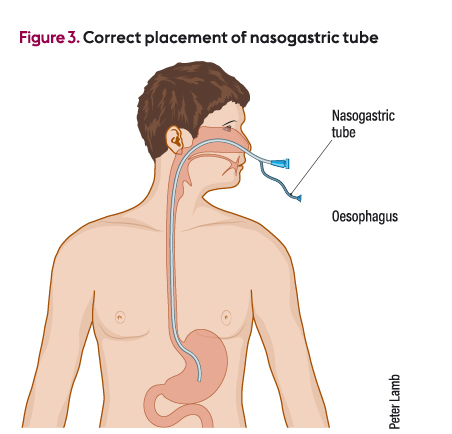

In [6]:
from IPython.display import Image
import PIL

'''
* ETT - Abnormal - endotracheal tube placement abnormal 气管插管异常
* ETT - Borderline - endotracheal tube placement borderline abnormal 气管导管放置边界线异常
* ETT - Normal - endotracheal tube placement normal 气管插管正常
* NGT - Abnormal - nasogastric tube placement abnormal 鼻胃管放置异常
* NGT - Borderline - nasogastric tube placement borderline abnormal 鼻胃管放置边界线异常
* NGT - Incompletely Imaged - nasogastric tube placement inconclusive due to imaging 由于成像而无法确定鼻胃管的位置
* NGT - Normal - nasogastric tube placement borderline normal 鼻胃管放置边界线正常
* CVC - Abnormal - central venous catheter placement abnormal 中心静脉导管放置异常
* CVC - Borderline - central venous catheter placement borderline abnormal 中心静脉导管放置边界线异常
* CVC - Normal - central venous catheter placement normal 中心静脉导管放置正常
* Swan Ganz Catheter Present 天鹅甘茨导尿管

ETT is thick,
NGT is thin, go from the nose, follow down the spine, to the stomach 
CVC starts from the 
Swan Ganz Catheter starts from the shoulder blade, goes down and forms a circle in the chest
''' 

# Image('images/ETT2comp.png') 
Image('images/NGT.jpg') 
# Image('images/CVC.jpg') 
# Image('images/Swan Ganz Catheter.jpeg') 

#### Show a certain image

1.2.826.0.1.3680043.8.498.68373218101350553681956232135004827520


,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID,ETT_sum,NGT_sum,CVC_sum
10515,1.2.826.0.1.3680043.8.498.68373218101350553681...,0,0,1,0,0,1,0,0,0,0,1,7a711c001,1,1,0


Dimensions: 2500 2048 Total pixels: 5120000


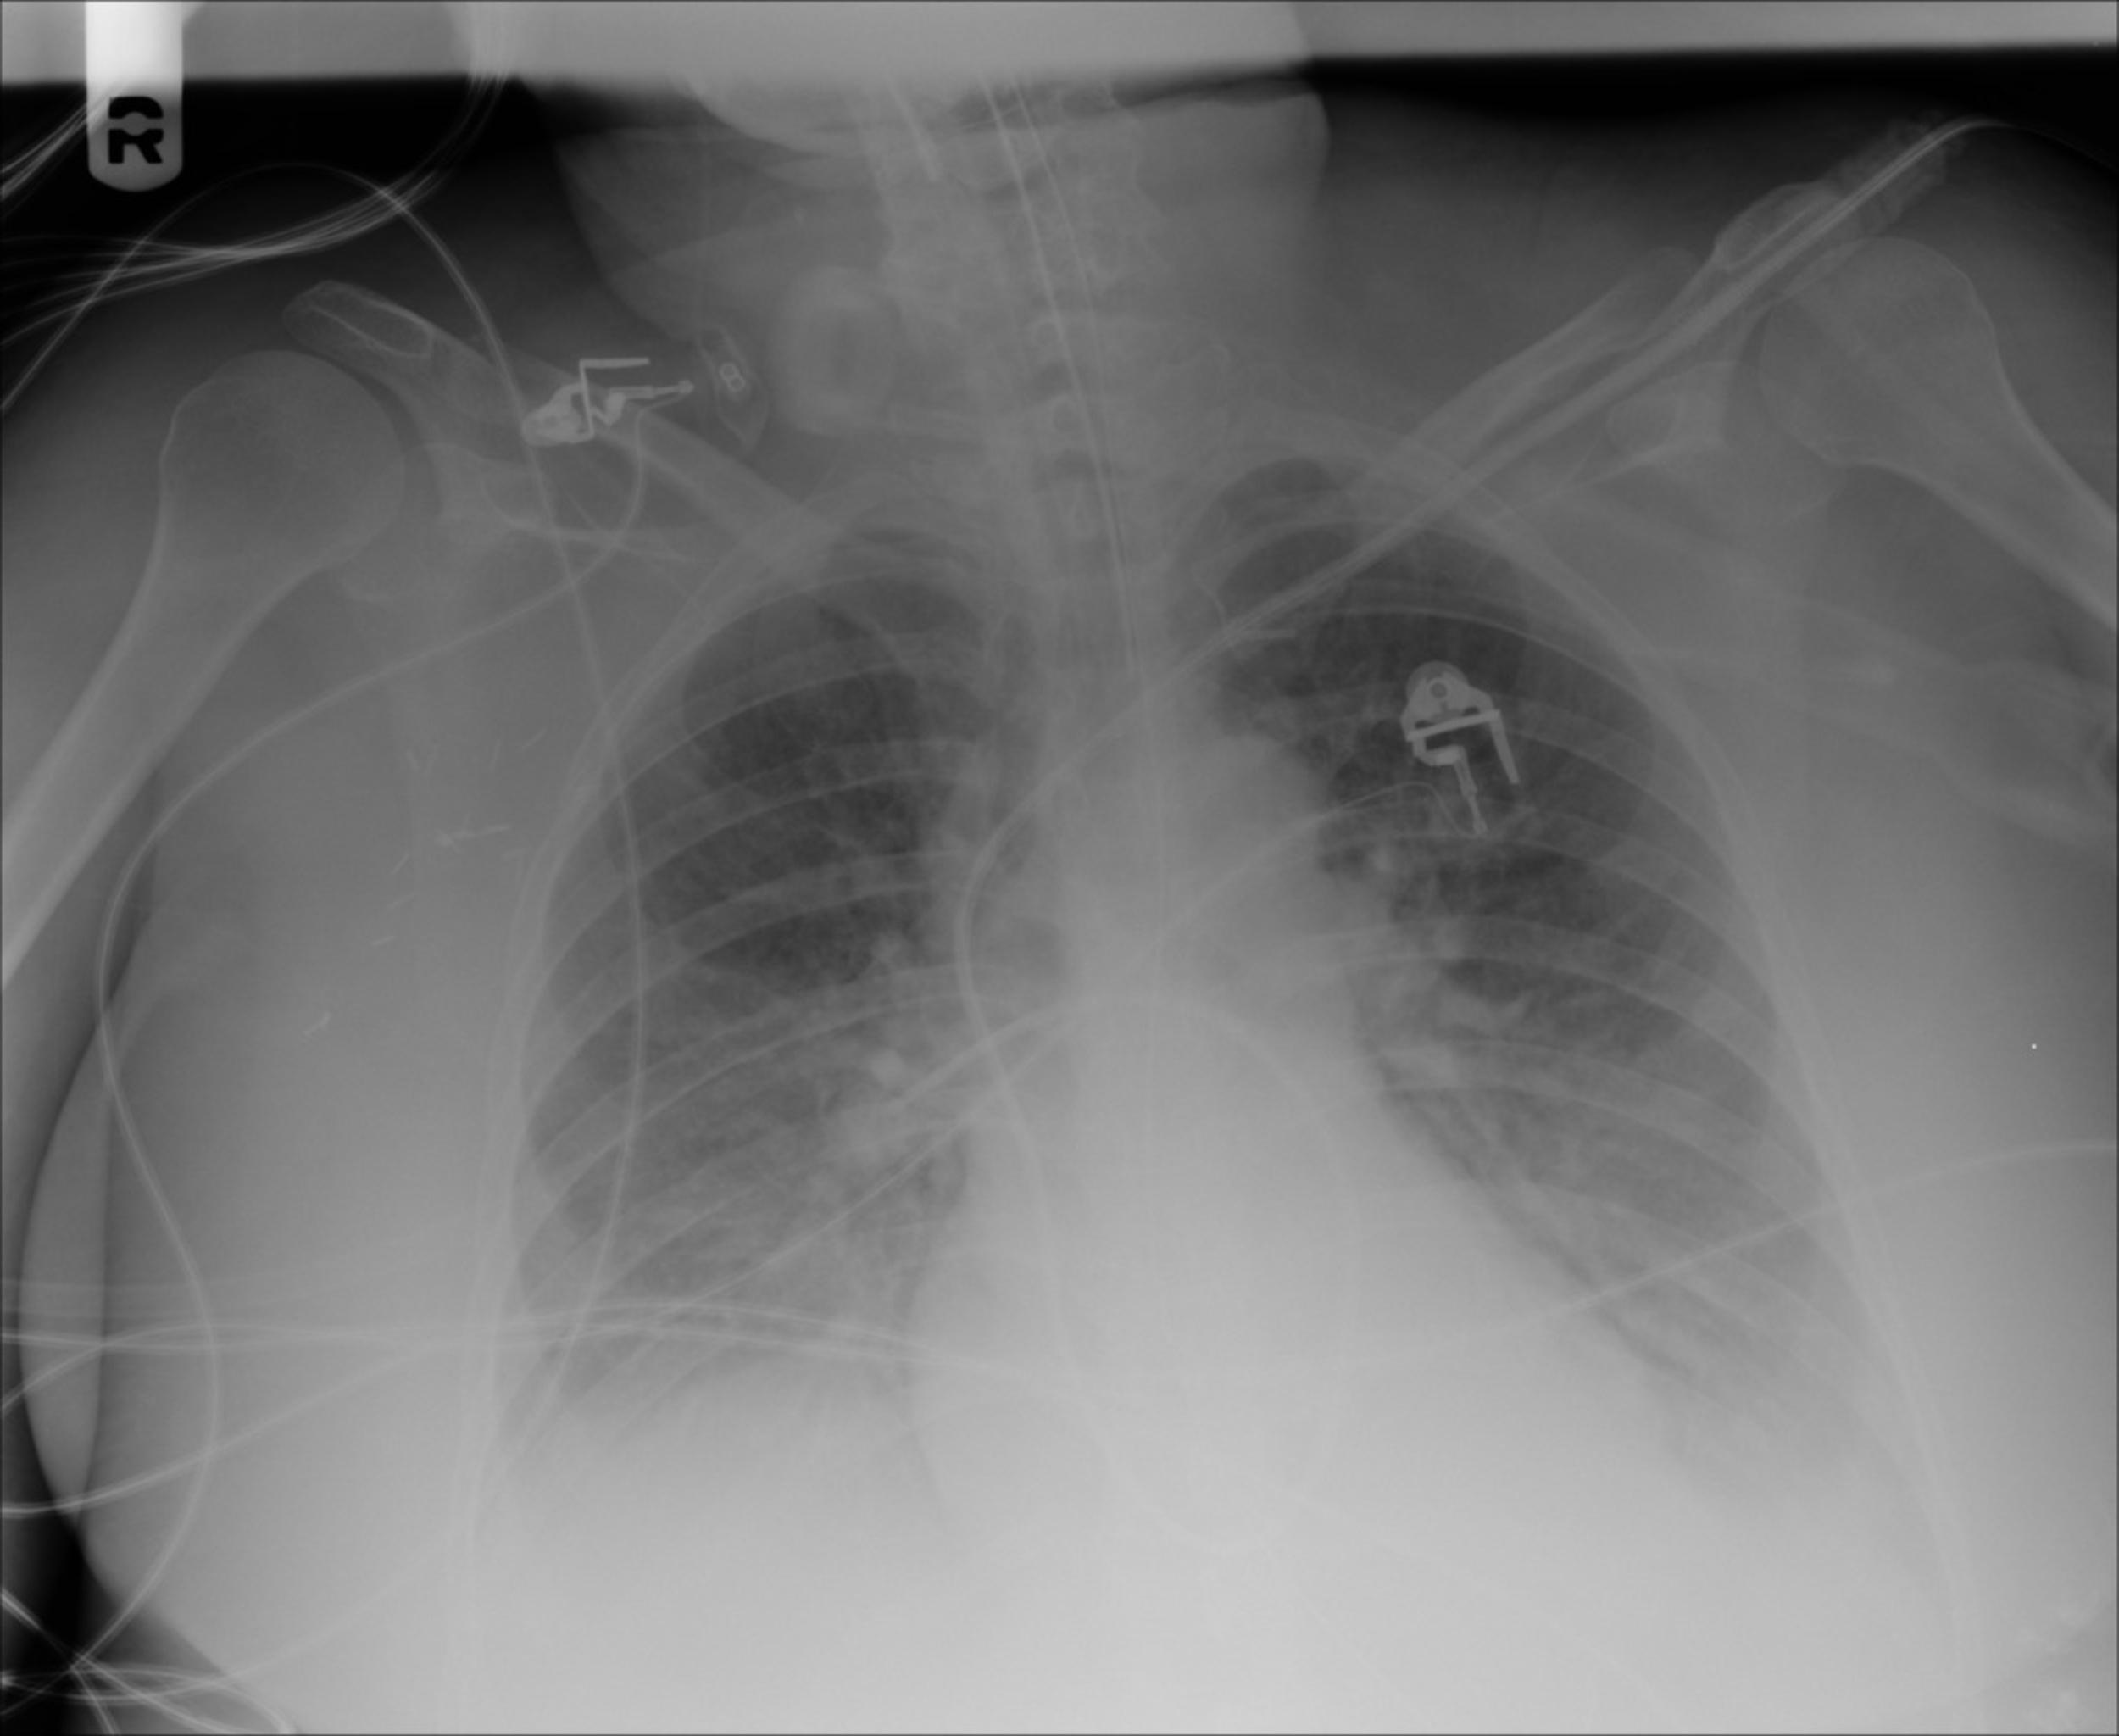

In [17]:
def get_num_pixels(filepath):
    width, height = PIL.Image.open(filepath).size
    print("Dimensions:", width, height, "Total pixels:", width * height)

    
df_show = df_train[df_train['StudyInstanceUID'].isin(df_annotation['StudyInstanceUID'])]
df_show = df_show[df_show['Swan Ganz Catheter Present']==1]
df_show = df_show.sample(1)
UID = df_show.iloc[0]['StudyInstanceUID']
#UID = '1.2.826.0.1.3680043.8.498.19099451586820239558563934243354649078'

filename = 'ranzcr-clip-catheter-line-classification/train/'+UID+'.jpg'
print(UID)
display(df_train[df_train['StudyInstanceUID']==UID])
get_num_pixels(filename)
Image(filename=filename) 

#### Adding annotation

,StudyInstanceUID,label,data
1566,1.2.826.0.1.3680043.8.498.12955628616474310875...,Swan Ganz Catheter Present,"[[1644, 52], [1658, 108], [1658, 161], [1626, ..."
1567,1.2.826.0.1.3680043.8.498.12955628616474310875...,CVC - Abnormal,"[[2496, 1004], [2429, 965], [2353, 929], [2272..."


,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID,ETT_sum,NGT_sum,CVC_sum
6885,1.2.826.0.1.3680043.8.498.12955628616474310875...,0,0,0,0,0,0,0,1,0,1,1,437c8ab56,0,0,2


Sample 1.2.826.0.1.3680043.8.498.12955628616474310875677591692106308039
-----------------------------------------------------------------------



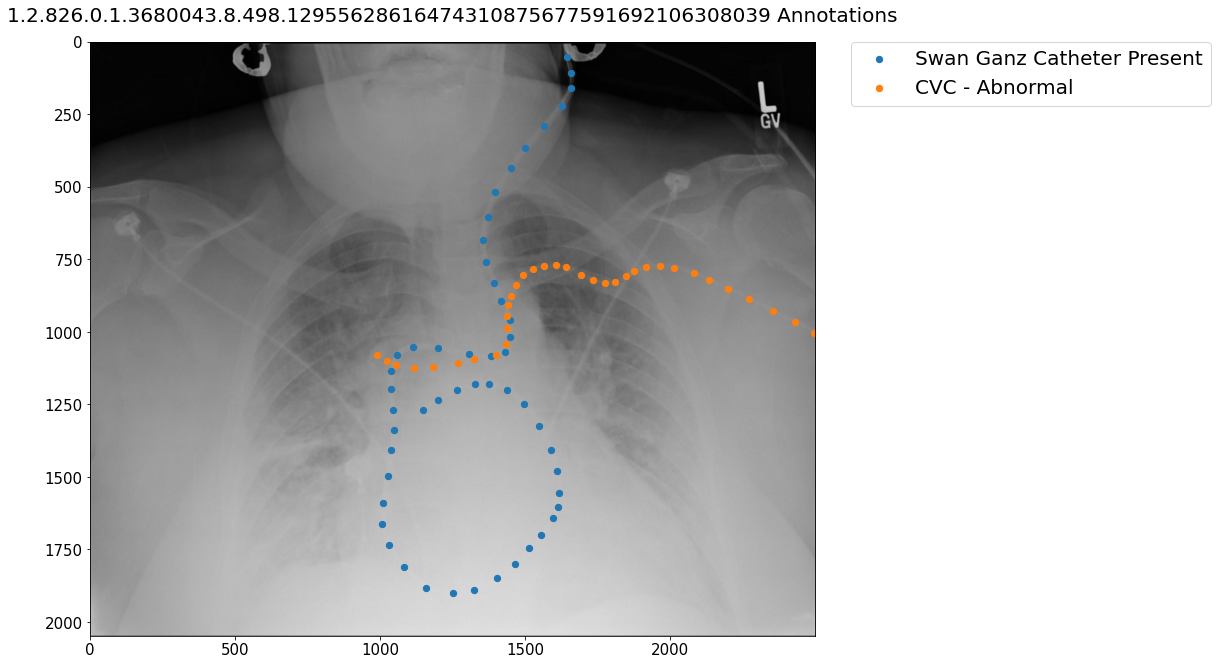

In [15]:
import cv2
# !pip3 install opencv-python

def visualize_annotations(UID):
    image = cv2.imread('ranzcr-clip-catheter-line-classification/train/'+UID+'.jpg')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    study_instance_uid = UID
    if study_instance_uid in df_annotation['StudyInstanceUID'].values:
        df_anno = df_annotation[df_annotation['StudyInstanceUID'] == study_instance_uid]
        display(df_anno)
        display(df_train[df_train['StudyInstanceUID']==UID])
        labels = df_anno[df_anno['StudyInstanceUID'] == study_instance_uid]['label'].values.tolist()
        lines = df_anno[df_anno['StudyInstanceUID'] == study_instance_uid]['data'].apply(lambda x: eval(x)).values.tolist()
        print(f'Sample {study_instance_uid}\n{"-" * (7 + len(study_instance_uid))}\n')
        fig = plt.figure(figsize=(image.shape[0] // 150, image.shape[1] // 150))
        ax = plt.imshow(image)
        for line, label in zip(lines, labels):
#             print(f'{label}\n{"-" * len(label)}\n{line}\n')            
            xs = []
            ys = []
            for point in line:
                xs.append(point[0])
                ys.append(point[-1])
            plt.scatter(xs, ys, s=40, label=label)
        plt.tick_params(axis='x', labelsize=15)
        plt.tick_params(axis='y', labelsize=15)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, prop={'size': 20})
        plt.title(f'{study_instance_uid} Annotations', size=20, pad=20)
        plt.show()
    else:
        print('No annotation for this image')
        return None
    
visualize_annotations(UID)

#### what's the logic of the labels here?
0-False, 1-True

Logically, only 1 out of the 3 ETT labels should be positive, so is the fact

Logically, only 1 out of the 4 NGT labels should be positive, but we have 45 controversial cases

Logically, only 1 out of the 3 CVC labels should be positive, but we have 3575 controversial cases, out of which 729 cases with both Abnormal and Normal at the same time, crazy shit

In [13]:
df_train['ETT_sum'] = (df_train['ETT - Abnormal'] + df_train['ETT - Borderline'] + df_train['ETT - Normal'])
print(df_train['ETT_sum'].value_counts())

df_train['NGT_sum'] = (df_train['NGT - Abnormal'] + df_train['NGT - Borderline'] + df_train['NGT - Normal'] + df_train['NGT - Incompletely Imaged'])
print(df_train['NGT_sum'].value_counts())
# display(df_train[df_train['NGT_sum']==2])

df_train['CVC_sum'] = (df_train['CVC - Abnormal'] + df_train['CVC - Borderline'] + df_train['CVC - Normal'])
print(df_train['CVC_sum'].value_counts())
df_train[(df_train['CVC - Abnormal']==1)&(df_train['CVC - Normal']==1)]


0    21626
1     8457
Name: ETT_sum, dtype: int64
0    21775
1     8263
2       45
Name: NGT_sum, dtype: int64
1    25758
2     3504
0      750
3       71
Name: CVC_sum, dtype: int64


,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID,ETT_sum,NGT_sum,CVC_sum
47,1.2.826.0.1.3680043.8.498.89553042032928832327...,0,0,1,0,0,0,1,1,0,1,0,10547f3fb,1,1,2
61,1.2.826.0.1.3680043.8.498.45114171511781107649...,0,0,0,0,0,0,0,1,0,1,0,55073fece,0,0,2
111,1.2.826.0.1.3680043.8.498.89409697793368109323...,0,1,0,0,0,0,1,1,0,1,0,8c979b95d,1,1,2
182,1.2.826.0.1.3680043.8.498.30375942591308414021...,0,1,0,0,0,1,0,1,1,1,0,ab02c52b6,1,1,3
188,1.2.826.0.1.3680043.8.498.74579763900891627023...,0,0,0,0,0,0,0,1,1,1,0,9831bde96,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29941,1.2.826.0.1.3680043.8.498.49317372225226939499...,0,1,0,0,0,0,1,1,0,1,0,77b006537,1,1,2
29962,1.2.826.0.1.3680043.8.498.41213877527271196610...,0,0,1,0,0,0,1,1,0,1,0,d50539e09,1,1,2
30050,1.2.826.0.1.3680043.8.498.54118311373184630469...,0,0,1,0,0,0,0,1,0,1,0,fbea83fd5,1,0,2
30068,1.2.826.0.1.3680043.8.498.98624384591890799789...,0,0,1,0,0,1,0,1,0,1,0,5733c2458,1,1,2


In [1]:
import cv2